### Cysteine metabolism correlation analysis
Here we explore more in depth the Cellfie analysis performed in Human Secretome Manuscript (https://docs.google.com/document/d/1wf7WS_8eKEnORkM-X4U-q0IeHBB0281lRp31aE2BqzI/edit?tab=t.0#heading=h.lnxbz9) to explore the correlation between cysteine metabolism tasks and protein yield

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

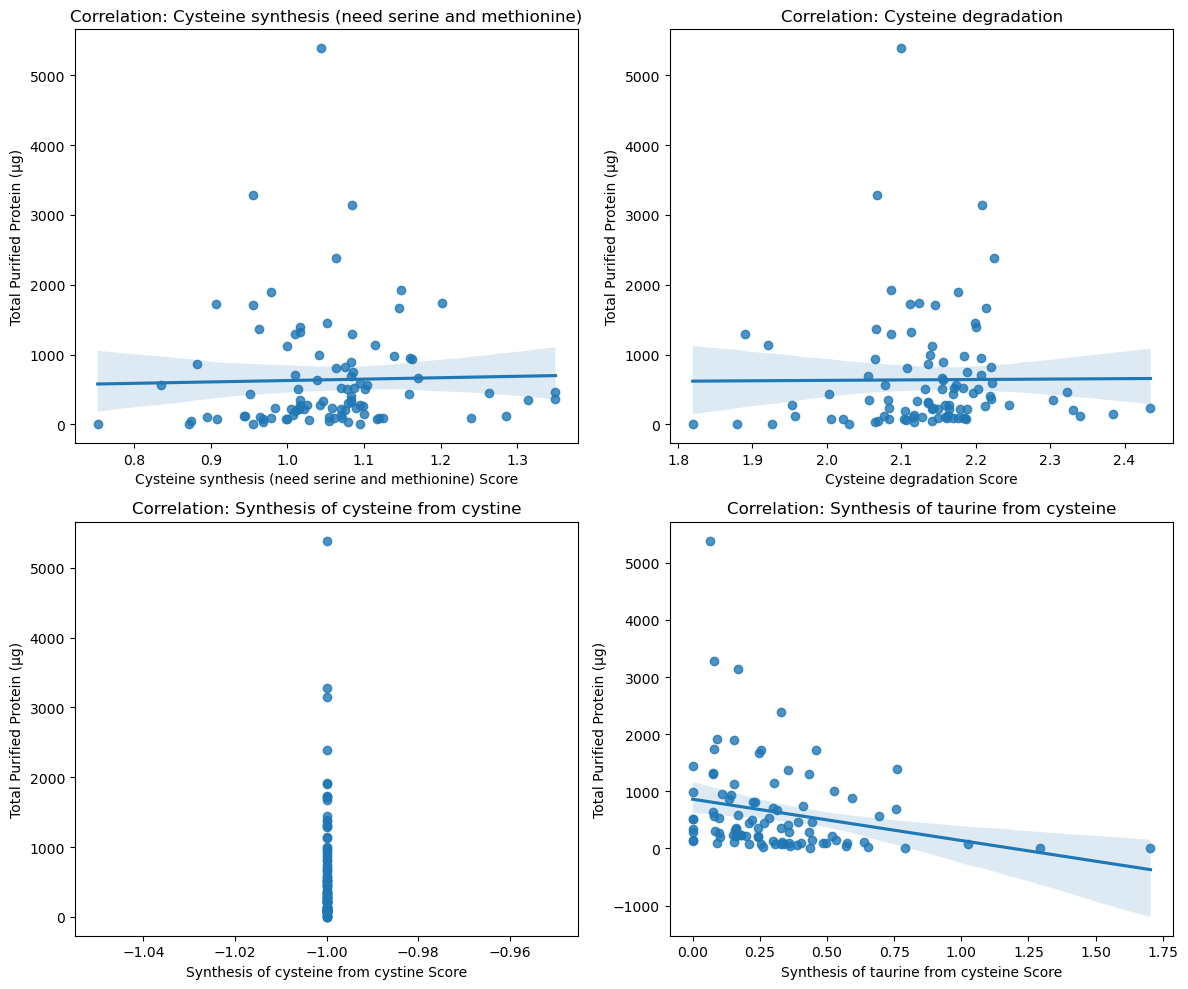

In [19]:
# Load data files
file_path = 'data/Supplementary Data 3 - Cellfie Analysis.xlsx'
csv_file_path = 'data/supplementary_data_1.csv'

# Load protein yield data
protein_yield_data = pd.read_csv(csv_file_path)
protein_yield = protein_yield_data[['sample_ID', 'Total.purified.protein_stock1.stock2_microg']]

# Load "Score" sheet
scores = pd.read_excel(file_path, sheet_name='Score', header=None)

# Define cysteine-related tasks and their corresponding rows (0-based indexing)
cysteine_tasks = {
    "Cysteine synthesis (need serine and methionine)": 80,
    "Cysteine degradation": 81,
    "Synthesis of cysteine from cystine": 82,
    "Synthesis of taurine from cysteine": 83
}

# Initialize an empty list to store structured data for all tasks
all_tasks_data = []

# Process each task
for task_name, task_row in cysteine_tasks.items():
    # Extract scores for the task
    task_scores = scores.iloc[task_row, :]

    # Convert scores into a DataFrame
    task_scores = task_scores.reset_index()
    task_scores.columns = ['sample_index', 'Score']

    # Add sample IDs (assuming columns map to sample IDs in protein yield data)
    task_scores['sample_ID'] = protein_yield['sample_ID'].values

    # Merge scores with protein yield data
    merged_data = pd.merge(protein_yield, task_scores, on='sample_ID', how='inner')

    # Convert to numeric and drop missing values
    merged_data['Total.purified.protein_stock1.stock2_microg'] = pd.to_numeric(
        merged_data['Total.purified.protein_stock1.stock2_microg'], errors='coerce'
    )
    merged_data['Score'] = pd.to_numeric(merged_data['Score'], errors='coerce')
    merged_data = merged_data.dropna()

    # Add task name column for differentiation
    merged_data['Task'] = task_name

    # Append to the combined list
    all_tasks_data.append(merged_data)

# Combine all task data into a single DataFrame
all_tasks_data = pd.concat(all_tasks_data, ignore_index=True)

# Reorganize columns for clarity
all_tasks_data = all_tasks_data[
    ['sample_ID', 'Task', 'Score', 'Total.purified.protein_stock1.stock2_microg']
]

# Create scatter plots with regression lines for each task
plt.figure(figsize=(12, 10))
for i, task_name in enumerate(cysteine_tasks.keys(), 1):
    plt.subplot(2, 2, i)
    sns.regplot(
        x='Score',
        y='Total.purified.protein_stock1.stock2_microg',
        data=all_tasks_data[all_tasks_data['Task'] == task_name],
        ci=95
    )
    plt.xlabel(f'{task_name} Score')
    plt.ylabel('Total Purified Protein (µg)')
    plt.title(f'Correlation: {task_name}')

plt.tight_layout()
plt.show()
